<a href="https://colab.research.google.com/github/BonneyBoja/Bonney-s-Portfolio/blob/main/Supervised_Machine_Learning_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target

In [ ]:
# --- 1. Explore the Dataset (EDA) ---
print("--- Dataset Head ---")
print(df.head())
print("\n--- Dataset Info ---")
df.info()
print("\n--- Class Distribution (Target) ---")
print(df['target'].value_counts())

--- Dataset Head ---
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline 

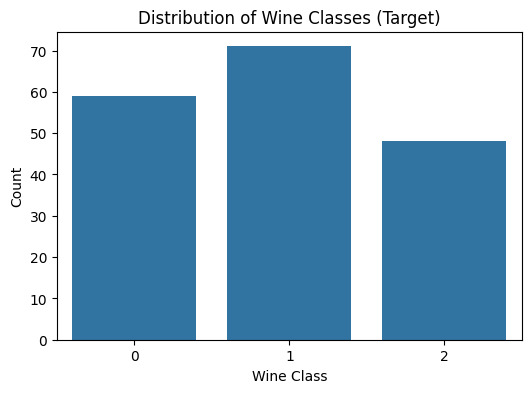

In [ ]:
# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Distribution of Wine Classes (Target)')
plt.xlabel('Wine Class')
plt.ylabel('Count')
plt.show()

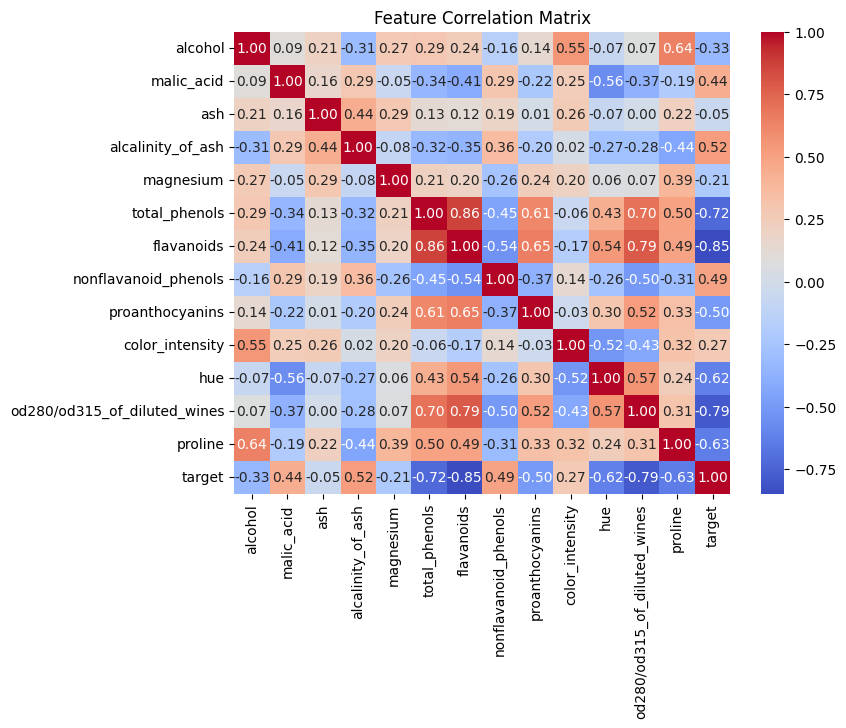

In [ ]:
# Visualize feature correlations
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

In [ ]:
# --- 2. Prepare the Data ---
# Handle missing values (check for NAs - the scikit-learn dataset is clean)
print("\n--- Missing Values Check ---")
print(df.isnull().sum().sort_values(ascending=False).head())

X = df.drop('target', axis=1)
y = df['target']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features (important for models like KNN, SVM, and Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for better logging (optional, but helpful)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)


--- Missing Values Check ---
alcohol              0
malic_acid           0
ash                  0
alcalinity_of_ash    0
magnesium            0
dtype: int64


In [ ]:
# --- 3. Build the Models ---
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC(random_state=42)
}

results = {}
conf_matrices = {}
model_report = {}

# Train and evaluate models
for name, model in models.items():
    # SVC and Logistic Regression perform better on scaled data
    if name in ["Logistic Regression", "K-Nearest Neighbors", "Support Vector Machine"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        # Decision Tree, Random Forest, Naive Bayes are less sensitive to scaling
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # --- 4. Evaluate the Models ---
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=wine.target_names, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = acc
    model_report[name] = report
    conf_matrices[name] = cm


--- Model Performance Comparison (Accuracy) ---
| Model                  | Accuracy   |
|:-----------------------|:-----------|
| Naive Bayes            | 1          |
| Random Forest          | 1          |
| Support Vector Machine | 0.9815     |
| Logistic Regression    | 0.9815     |
| Decision Tree          | 0.963      |
| K-Nearest Neighbors    | 0.9444     |


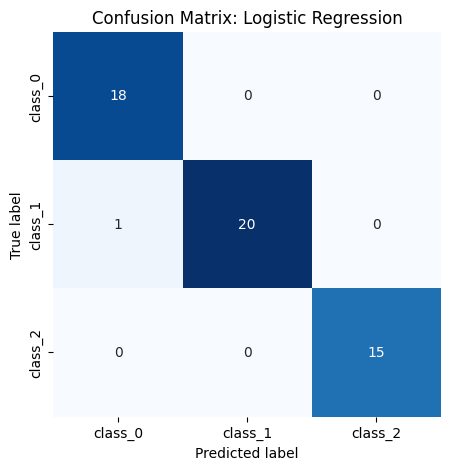

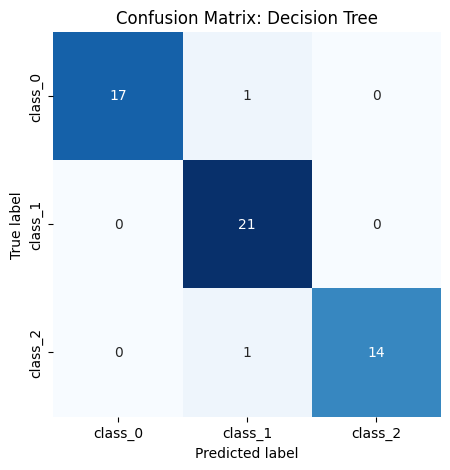

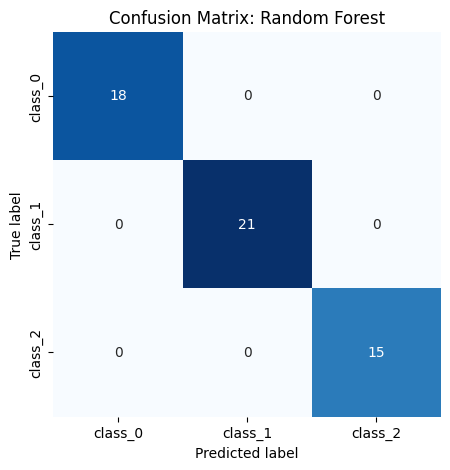

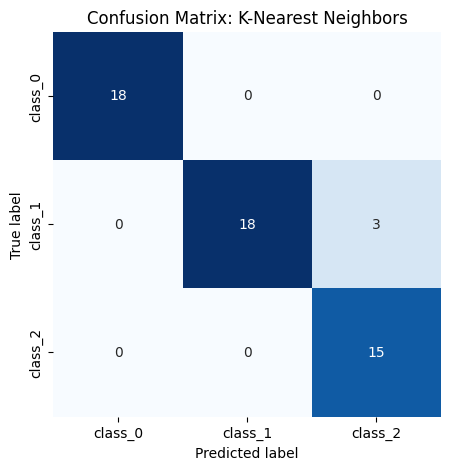

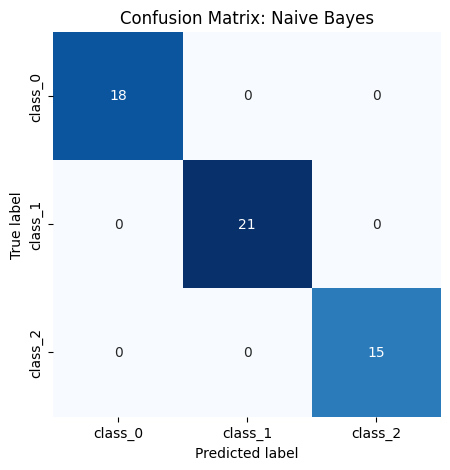

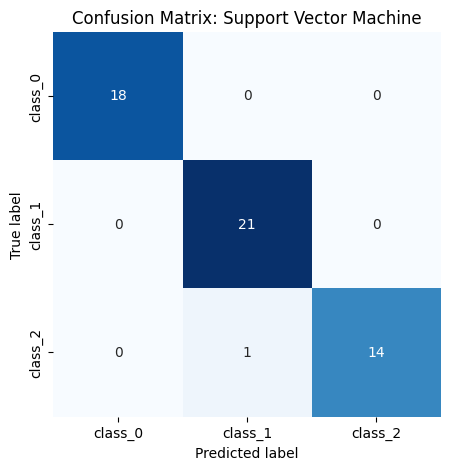

In [ ]:
# --- 5. Compare the models (Summary Table) ---
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [round(acc, 4) for acc in results.values()]
}).sort_values(by='Accuracy', ascending=False)

print("\n--- Model Performance Comparison (Accuracy) ---")
print(comparison_df.to_markdown(index=False, numalign="left", stralign="left"))

# Function to plot confusion matrix
def plot_confusion_matrix(cm, labels, title):
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Visualize Confusion Matrices for all models
for name, cm in conf_matrices.items():
    plot_confusion_matrix(cm, wine.target_names, f'Confusion Matrix: {name}')